<a href="https://colab.research.google.com/github/niteshkumar2000/Forward-Backward-Selection/blob/master/DataScienceAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forward-Backward-Selection with Early Dropping

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)



## Preprocessing wine dataset

In [0]:
from sklearn.datasets import load_wine
data = load_wine()

In [0]:
x = pd.DataFrame(data.data)
x.columns = data.feature_names
y = pd.DataFrame(data.target)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [6]:
print(x.head())
print(x_train.shape, x_test.shape)

   alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0    14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1    13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2    13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3    14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4    13.24        2.59  2.87  ...  1.04                          2.93    735.0

[5 rows x 13 columns]
(142, 13) (36, 13)



## Implementation of FBS algorithm


Performing Forward Selection

In [7]:
forwardres = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = 7,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   11.4s finished

[2020-04-13 11:17:04] Features: 1/7 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    8.9s finished

[2020-04-13 11:17:13] Features: 2/7 -- score: 0.9718253968253968[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    8.5s finished

[2020-04-13 11:17:21] Features: 3/7 -- score: 0.9859126984126985[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.4s finished

[2020-04-13 11:17:29] Features: 4/7 -- score: 0.9789682539682539[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    7.2s finished

[202

Printing Results of Forward Selection

In [8]:
print(forwardres.k_feature_names_)
print(forwardres.k_score_)

('alcohol', 'ash', 'magnesium', 'flavanoids', 'proanthocyanins', 'color_intensity', 'proline')
0.9791666666666666


Data for Backward Selection

In [0]:
import copy
backdata = copy.deepcopy(pd.DataFrame(x_train, columns=forwardres.k_feature_names_))

## Performing Backward Selection on the result of forward selection

In [15]:
backwardres = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = 4,
          forward= False,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(backdata.values, np.ravel(y_train))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    5.7s finished

[2020-04-13 11:36:21] Features: 6/4 -- score: 0.9789682539682539[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.5s finished

[2020-04-13 11:36:25] Features: 5/4 -- score: 0.9857142857142858[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished

[2020-04-13 11:36:30] Features: 4/4 -- score: 0.9787698412698413

### Printing final result using backward selection

In [16]:
print(backwardres.k_feature_names_)
print(backwardres.k_score_)

('2', '3', '4', '5')
0.9787698412698413


The result are the columns ('2', '3', '4', '5') of backdata when four features are selected

('magnesium', 'flavanoids', 'proanthocyanins', 'color_intensity') are the selected feature with score 0.97876

# Implementation of FBED (with early dropping)

In [20]:
data1 = copy.deepcopy(x_train)
data2 = copy.deepcopy(x_train)
for i in range(1,6):
  #change iteration as needed
  forwwithearly = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = i,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(data1, y_train)
  print(forwwithearly.k_feature_names_)
  for j in range(i):
    if forwwithearly.k_feature_names_[j] in data2.columns:
      del data2[forwwithearly.k_feature_names_[j]]
  print(data2)
  print(data1)
  columncorr = set() 
  corrmatrix = data2.corr()
  for i in range(len(corrmatrix.columns)):
      for j in range(i):
        if (corrmatrix.iloc[i, j] >= 0.70) and (corrmatrix.columns[j] not in columncorr):
            columnname = corrmatrix.columns[i]
            columncorr.add(columnname)
            if columnname in data2.columns:
                del data2[columnname] 
                del data1[columnname]
                print(columnname)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   10.4s finished

[2020-04-13 11:40:06] Features: 1/1 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


('flavanoids',)
     alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
161    13.69        3.26  2.54  ...  0.96                          1.82    680.0
92     12.69        1.53  2.26  ...  0.96                          2.06    495.0
94     11.62        1.99  2.28  ...  1.16                          2.96    345.0
174    13.40        3.91  2.48  ...  0.70                          1.56    750.0
24     13.50        1.81  2.61  ...  1.12                          3.82    845.0
..       ...         ...   ...  ...   ...                           ...      ...
103    11.82        1.72  1.88  ...  0.94                          2.44    415.0
67     12.37        1.17  1.92  ...  1.12                          3.48    510.0
117    12.42        1.61  2.19  ...  1.06                          2.96    345.0
47     13.90        1.68  2.12  ...  0.91                          3.33    985.0
172    14.16        2.51  2.48  ...  0.62                          1.71    660.0

[142 rows x

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    8.9s finished

[2020-04-13 11:40:15] Features: 1/2 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    8.6s finished

[2020-04-13 11:40:23] Features: 2/2 -- score: 0.9718253968253968[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


('flavanoids', 'color_intensity')
     alcohol  malic_acid   ash  ...  proanthocyanins   hue  proline
161    13.69        3.26  2.54  ...             0.80  0.96    680.0
92     12.69        1.53  2.26  ...             1.62  0.96    495.0
94     11.62        1.99  2.28  ...             1.35  1.16    345.0
174    13.40        3.91  2.48  ...             1.41  0.70    750.0
24     13.50        1.81  2.61  ...             1.66  1.12    845.0
..       ...         ...   ...  ...              ...   ...      ...
103    11.82        1.72  1.88  ...             1.42  0.94    415.0
67     12.37        1.17  1.92  ...             1.04  1.12    510.0
117    12.42        1.61  2.19  ...             1.61  1.06    345.0
47     13.90        1.68  2.12  ...             2.14  0.91    985.0
172    14.16        2.51  2.48  ...             1.24  0.62    660.0

[142 rows x 10 columns]
     alcohol  malic_acid   ash  ...  color_intensity   hue  proline
161    13.69        3.26  2.54  ...             5.88  0.9

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    8.8s finished

[2020-04-13 11:40:32] Features: 1/3 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    8.8s finished

[2020-04-13 11:40:41] Features: 2/3 -- score: 0.9718253968253968[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.5s finished

[2020-04-13 11:40:49] Features: 3/3 -- score: 0.9859126984126985[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


('magnesium', 'flavanoids', 'color_intensity')
     alcohol  malic_acid   ash  ...  proanthocyanins   hue  proline
161    13.69        3.26  2.54  ...             0.80  0.96    680.0
92     12.69        1.53  2.26  ...             1.62  0.96    495.0
94     11.62        1.99  2.28  ...             1.35  1.16    345.0
174    13.40        3.91  2.48  ...             1.41  0.70    750.0
24     13.50        1.81  2.61  ...             1.66  1.12    845.0
..       ...         ...   ...  ...              ...   ...      ...
103    11.82        1.72  1.88  ...             1.42  0.94    415.0
67     12.37        1.17  1.92  ...             1.04  1.12    510.0
117    12.42        1.61  2.19  ...             1.61  1.06    345.0
47     13.90        1.68  2.12  ...             2.14  0.91    985.0
172    14.16        2.51  2.48  ...             1.24  0.62    660.0

[142 rows x 9 columns]
     alcohol  malic_acid   ash  ...  color_intensity   hue  proline
161    13.69        3.26  2.54  ...          

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    9.0s finished

[2020-04-13 11:40:58] Features: 1/4 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    8.6s finished

[2020-04-13 11:41:06] Features: 2/4 -- score: 0.9718253968253968[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.4s finished

[2020-04-13 11:41:14] Features: 3/4 -- score: 0.9859126984126985[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    7.2s finished

[2020-04-13 11:41:21] Features: 4/4 -- score: 0.9789682539682539[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


('magnesium', 'flavanoids', 'color_intensity', 'proline')
     alcohol  malic_acid   ash  ...  nonflavanoid_phenols  proanthocyanins   hue
161    13.69        3.26  2.54  ...                  0.50             0.80  0.96
92     12.69        1.53  2.26  ...                  0.58             1.62  0.96
94     11.62        1.99  2.28  ...                  0.17             1.35  1.16
174    13.40        3.91  2.48  ...                  0.43             1.41  0.70
24     13.50        1.81  2.61  ...                  0.28             1.66  1.12
..       ...         ...   ...  ...                   ...              ...   ...
103    11.82        1.72  1.88  ...                  0.37             1.42  0.94
67     12.37        1.17  1.92  ...                  0.27             1.04  1.12
117    12.42        1.61  2.19  ...                  0.34             1.61  1.06
47     13.90        1.68  2.12  ...                  0.21             2.14  0.91
172    14.16        2.51  2.48  ...                

[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    8.9s finished

[2020-04-13 11:41:30] Features: 1/5 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    8.6s finished

[2020-04-13 11:41:39] Features: 2/5 -- score: 0.9718253968253968[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.4s finished

[2020-04-13 11:41:46] Features: 3/5 -- score: 0.9859126984126985[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    7.2s finished

[2020-04-13 11:41:53] Features: 4/5 -- score: 0.9789682539682539[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


('ash', 'magnesium', 'flavanoids', 'color_intensity', 'proline')
     alcohol  malic_acid  ...  proanthocyanins   hue
161    13.69        3.26  ...             0.80  0.96
92     12.69        1.53  ...             1.62  0.96
94     11.62        1.99  ...             1.35  1.16
174    13.40        3.91  ...             1.41  0.70
24     13.50        1.81  ...             1.66  1.12
..       ...         ...  ...              ...   ...
103    11.82        1.72  ...             1.42  0.94
67     12.37        1.17  ...             1.04  1.12
117    12.42        1.61  ...             1.61  1.06
47     13.90        1.68  ...             2.14  0.91
172    14.16        2.51  ...             1.24  0.62

[142 rows x 7 columns]
     alcohol  malic_acid   ash  ...  color_intensity   hue  proline
161    13.69        3.26  2.54  ...             5.88  0.96    680.0
92     12.69        1.53  2.26  ...             3.05  0.96    495.0
94     11.62        1.99  2.28  ...             3.25  1.16    345.0
174

[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    6.0s finished

[2020-04-13 11:41:59] Features: 5/5 -- score: 0.9720238095238095

In [22]:
print(columnname)

od280/od315_of_diluted_wines


 ### The early dropped attribute is mentioned above

In [23]:
print(forwwithearly.k_feature_names_)

('ash', 'magnesium', 'flavanoids', 'color_intensity', 'proline')


In [24]:
print(forwwithearly.k_score_)

0.9720238095238095


In [0]:
selectedforback = copy.deepcopy(pd.DataFrame(x_train, columns=forwwithearly.k_feature_names_))

In [27]:
print(selectedforback)

      ash  magnesium  flavanoids  color_intensity  proline
161  2.54      107.0        0.56             5.88    680.0
92   2.26       80.0        1.46             3.05    495.0
94   2.28       98.0        2.26             3.25    345.0
174  2.48      102.0        0.75             7.30    750.0
24   2.61       96.0        2.61             3.52    845.0
..    ...        ...         ...              ...      ...
103  1.88       86.0        1.64             2.06    415.0
67   1.92       78.0        2.00             4.68    510.0
117  2.19      108.0        2.09             2.06    345.0
47   2.12      101.0        3.39             6.10    985.0
172  2.48       91.0        0.70             9.70    660.0

[142 rows x 5 columns]


In [28]:
Finalres = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = 4,
          forward= False,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(selectedforback.values, np.ravel(y_train))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.3s finished

[2020-04-13 11:44:35] Features: 4/4 -- score: 0.9718253968253968

## Results

In [29]:
print(Finalres.k_feature_idx_)

(0, 1, 2, 3)


which are ('ash', 'magnesium', 'flavanoids', 'color_intensity')


In [32]:
print(Finalres.k_score_)

0.9718253968253968


Thus forward-Backward selection with early dropping is done by finding the independent variables and eliminating it which decreases the run time significantly by giving almost same accuracy. Each iteration performed during forward selection is depicted for any number of features.

Early dropping is done by finding the correlation matrix after performing each iteration of Forward Selection

In [34]:
print(x_train)

     alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
161    13.69        3.26  2.54  ...  0.96                          1.82    680.0
92     12.69        1.53  2.26  ...  0.96                          2.06    495.0
94     11.62        1.99  2.28  ...  1.16                          2.96    345.0
174    13.40        3.91  2.48  ...  0.70                          1.56    750.0
24     13.50        1.81  2.61  ...  1.12                          3.82    845.0
..       ...         ...   ...  ...   ...                           ...      ...
103    11.82        1.72  1.88  ...  0.94                          2.44    415.0
67     12.37        1.17  1.92  ...  1.12                          3.48    510.0
117    12.42        1.61  2.19  ...  1.06                          2.96    345.0
47     13.90        1.68  2.12  ...  0.91                          3.33    985.0
172    14.16        2.51  2.48  ...  0.62                          1.71    660.0

[142 rows x 13 columns]


In [0]:
cordata = copy.deepcopy(x_train)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


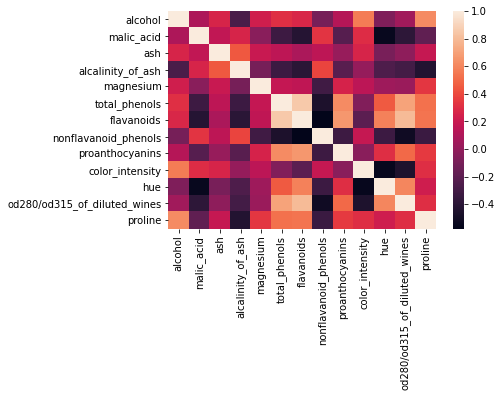

In [43]:
import seaborn as sea
sea.heatmap(cordata.corr())

In [32]:
cordata.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})

Early Dropping helps in decresing the time consumption of the model

Also the method  Exhaustive Feature Selection helps in attaining best scores with best attributes but time consuming

In [0]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [0]:
exhaustive = EFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
         min_features= 4,
          max_features= 5,
          scoring='accuracy',
          cv = None,
          n_jobs=-1
         ).fit(x_train, y_train)

But this method consumes maximum time of all increasing the Accuracy

Thank You

Regards

17PW14

17PW24

17PW38